In [1]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras 
from skimage.transform import resize
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data

def check_dicom(filename): 
    dicom_data = pydicom.dcmread(filename)  
    
    if dicom_data.Modality != 'DX':
        print('Invalid data: Data is not Digital Radiography')
        return (None, None)
        
    elif dicom_data.BodyPartExamined != 'CHEST':
        print('Invalid data: The Body Part is not labeld as a CHEST')
        return (None, None)
    
    elif dicom_data.PatientPosition not in ['PA', 'AP']:
        print('Invalid data: The patient\'s position is not labeld as PA or AP')
        return (None, None)
    
              
    img = dicom_data.pixel_array
    return (img, dicom_data)

    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
    
def preprocess_image(img,img_size): 
    normalized_img  = img / 255
    resized_img = resize(img, (img_size[1], img_size[2]))
    proc_img = resized_img.reshape((1, img_size[1], img_size[2], 1))
    proc_img = np.repeat(proc_img, img_size[3], axis=3)
    return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_model(model_path, weight_path):

    return tf.keras.models.load_model("my_model")

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
 
    if model.predict(img)>thresh:
        return 'Pneumonia'
    else:
        return 'No Pneumonia'

Prediction: Pneumonia
Label: No Pneumonia


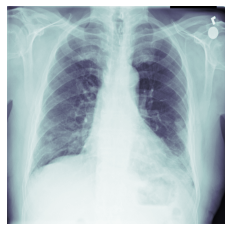



Prediction: Pneumonia
Label: No Pneumonia


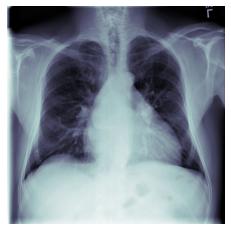



Prediction: Pneumonia
Label: No Pneumonia


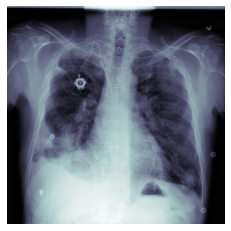



Invalid data: The Body Part is not labeld as a CHEST



Invalid data: Data is not Digital Radiography



Invalid data: The patient's position is not labeld as PA or AP





In [3]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

model_path = "my_model.json"
weight_path = "{}_my_model.best.hdf5".format('xray_class')

IMG_SIZE=(1,224,224,3) # This might be different if you did not use vgg16

my_model = load_model(model_path, weight_path)
thresh = 0.3741466

# use the .dcm files to test your prediction
for i in test_dicoms:
    
    img, dicom = check_dicom(i)
    
    if img is None:
        print('\n\n')
        continue
        
    img_proc = preprocess_image(img, IMG_SIZE)
    pred = predict_image(my_model,img_proc,thresh)
    print(f'Prediction: {pred}')
    print(f'Label: {"No Pneumonia" if dicom.StudyDescription.lower() != "pneumonia" else "Pneumonia"}')
    
    plt.imshow(img, cmap='bone')
    plt.axis("off")
    plt.show()
    print('\n')